In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from glob import glob

In [2]:
data = pd.read_csv("../../Data/DHS Prediction/health_data.csv")

# Data Resize
* Age 13
    * categories 1 - 13; where 1 is 18-24, 9 is 60-64, 13 is 80+
* Sex
    * 0:Female 1:Male
* HighChol
    * 1: True
* CholCheck in 5 years bool
* BMI
* Smoker smoked > 5packs bool
* HeartDiseaseorAttack
    * 0:CHD 1:Myocardial Infarction
* PhysActivity past 30 days bool
* Fruits Consume regularrly bool
* Veggies Consume regularrly bool
* HvyAlcoholConsump bool
* GenHlth
    * Self reported health scale 1 excellent - 5 poor
* MentHlth
    * Days of poor mental health past 30 days
* PhysHlth
    * illness or injury count in past 30 days
* DiffWalk bool
    * difficulty walking/climbing stairs
<br>

<h4>Labels:</h4>

* Diabetes
* Hypertension
* Stroke

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   70692 non-null  float64
 1   Sex                   70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   HeartDiseaseorAttack  70692 non-null  float64
 7   PhysActivity          70692 non-null  float64
 8   Fruits                70692 non-null  float64
 9   Veggies               70692 non-null  float64
 10  HvyAlcoholConsump     70692 non-null  float64
 11  GenHlth               70692 non-null  float64
 12  MentHlth              70692 non-null  float64
 13  PhysHlth              70692 non-null  float64
 14  DiffWalk              70692 non-null  float64
 15  Diabetes           

### Let's change types
We have very many bools counting as float64, this is unneccesary data usage. Let's verify their containers

In [4]:
d = {}
bools = ['Sex', 'HighChol', 'CholCheck', 'Smoker', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'DiffWalk', 'Diabetes', 'Hypertension', 'Stroke']
for col in bools:
    d[col] = data[col].value_counts()
pd.DataFrame.from_dict(d)

,Sex,HighChol,CholCheck,Smoker,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,DiffWalk,Diabetes,Hypertension,Stroke
0.0,38386,33529,1749,37094,20993,27443,14932,67672,52826,35346,30860,66297
1.0,32306,37163,68943,33598,49699,43249,55760,3020,17866,35346,39832,4395


In [5]:
for col in bools:
    data[col] = data[col].astype('bool')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   70692 non-null  float64
 1   Sex                   70692 non-null  bool   
 2   HighChol              70692 non-null  bool   
 3   CholCheck             70692 non-null  bool   
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  bool   
 6   HeartDiseaseorAttack  70692 non-null  float64
 7   PhysActivity          70692 non-null  bool   
 8   Fruits                70692 non-null  bool   
 9   Veggies               70692 non-null  bool   
 10  HvyAlcoholConsump     70692 non-null  bool   
 11  GenHlth               70692 non-null  float64
 12  MentHlth              70692 non-null  float64
 13  PhysHlth              70692 non-null  float64
 14  DiffWalk              70692 non-null  bool   
 15  Diabetes           

Already the data size has been reduced by over 50% Let's inspect more to see if there are any other datasets not appearing as they are listed.<br>

### Age
Given the information we have on the age, there isn't really a way we can safely deconstruct it so we will be keeping age as is.

In [7]:
data.Age.value_counts()

10.0    10856
9.0     10112
8.0      8603
11.0     8044
7.0      6872
13.0     5426
12.0     5394
6.0      4648
5.0      3520
4.0      2793
3.0      2049
2.0      1396
1.0       979
Name: Age, dtype: int64

In [8]:
data['Age'] = data['Age'].astype('int16')

### BMI
BMI is a medical indicator typically broken into five groups: 
* Underweight 
* Nominal 
* Overweight 
* Obese 1 
* Obese 2
* Obese 3

We may find more use to calculate BMI as an ordinal

In [9]:
data.BMI.value_counts().reset_index().sort_values(by='index',ascending=False)

,index,BMI
71,98.0,4
68,95.0,4
58,92.0,9
69,89.0,4
52,87.0,13
...,...,...
38,16.0,70
43,15.0,30
64,14.0,8
63,13.0,8


In [10]:
data['BMIGroup'] = pd.cut(
    data['BMI'],
    [0, 19, 25, 30, 35,40,float('inf')],
    labels=['underweight','nominal','overweight','obese1','obese2','obese3']
)

In [11]:
data['BMIGroup']

0         overweight
1         overweight
2         overweight
3         overweight
4         overweight
            ...     
70687         obese2
70688     overweight
70689        nominal
70690    underweight
70691        nominal
Name: BMIGroup, Length: 70692, dtype: category
Categories (6, object): ['underweight' < 'nominal' < 'overweight' < 'obese1' < 'obese2' < 'obese3']

## HeartDiseaseorAttack

<h4>Values</h4>

* 0: Coronary Heart Disease 
* 1: Myocardial Infarction

<h4>Analysis</h4>

This is a bit of a unique feature and the format of its existence raises alot of questions. The first being, should we even use this feature? Predicting hypertension seems secondary when the subject has suffered a infarction. We should at the very least produce this as a hyperparameter to easily turn it off. Was this feature created by another algorithm? (I.E. Feature Extraction)? If every subject has CHD, is this a subset of a much larger dataset? Are these either or, or can one have both CHD and an infarction.

On one hand, we can hypothesis that this feature will be highly correlated to hypertension. On the other, using heart attacks to predict hypertension could be putting the carrage before the horse.

In [12]:
data.HeartDiseaseorAttack.value_counts()

0.0    60243
1.0    10449
Name: HeartDiseaseorAttack, dtype: int64

In [13]:
data['HeartDiseaseorAttack'] = data['HeartDiseaseorAttack'].astype('bool')
data.rename(columns={'HeartDiseaseorAttack':'HeartAttack'}, inplace=True)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Age                70692 non-null  int16   
 1   Sex                70692 non-null  bool    
 2   HighChol           70692 non-null  bool    
 3   CholCheck          70692 non-null  bool    
 4   BMI                70692 non-null  float64 
 5   Smoker             70692 non-null  bool    
 6   HeartAttack        70692 non-null  bool    
 7   PhysActivity       70692 non-null  bool    
 8   Fruits             70692 non-null  bool    
 9   Veggies            70692 non-null  bool    
 10  HvyAlcoholConsump  70692 non-null  bool    
 11  GenHlth            70692 non-null  float64 
 12  MentHlth           70692 non-null  float64 
 13  PhysHlth           70692 non-null  float64 
 14  DiffWalk           70692 non-null  bool    
 15  Diabetes           70692 non-null  bool    
 16  Hype

## Finishing Data Resize

* GenHlth            70692 non-null  float64 
* MentHlth           70692 non-null  float64 
* PhysHlth           70692 non-null  float64 

In [15]:
data['GenHlth'].value_counts()

3.0    23427
2.0    19872
4.0    13303
1.0     8282
5.0     5808
Name: GenHlth, dtype: int64

In [16]:
data['GenHlth'] = data['GenHlth'].astype('int8')
data['GenHlth'].value_counts()

3    23427
2    19872
4    13303
1     8282
5     5808
Name: GenHlth, dtype: int64

In [17]:
data['MentHlth'].value_counts()

0.0     48091
30.0     4320
2.0      3267
5.0      2519
1.0      2051
3.0      1967
10.0     1924
15.0     1767
20.0     1125
4.0       981
7.0       825
25.0      425
14.0      353
6.0       288
8.0       198
12.0      130
28.0       99
21.0       84
29.0       53
18.0       42
16.0       28
9.0        28
22.0       22
17.0       18
26.0       17
27.0       17
13.0       15
23.0       13
24.0       10
11.0        8
19.0        7
Name: MentHlth, dtype: int64

In [18]:
data['MentHlth'] = data['MentHlth'].astype('int32')

In [19]:
data['PhysHlth'].value_counts()

0.0     39915
30.0     7953
2.0      4102
1.0      2853
3.0      2438
5.0      2332
10.0     1980
15.0     1913
4.0      1376
7.0      1326
20.0     1292
14.0      802
25.0      557
6.0       447
8.0       276
21.0      229
28.0      211
12.0      205
29.0       95
9.0        55
18.0       50
16.0       50
17.0       35
27.0       34
22.0       31
23.0       27
26.0       26
13.0       26
24.0       24
11.0       22
19.0       10
Name: PhysHlth, dtype: int64

In [20]:
data['PhysHlth'] = data['PhysHlth'].astype('int32')

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Age                70692 non-null  int16   
 1   Sex                70692 non-null  bool    
 2   HighChol           70692 non-null  bool    
 3   CholCheck          70692 non-null  bool    
 4   BMI                70692 non-null  float64 
 5   Smoker             70692 non-null  bool    
 6   HeartAttack        70692 non-null  bool    
 7   PhysActivity       70692 non-null  bool    
 8   Fruits             70692 non-null  bool    
 9   Veggies            70692 non-null  bool    
 10  HvyAlcoholConsump  70692 non-null  bool    
 11  GenHlth            70692 non-null  int8    
 12  MentHlth           70692 non-null  int32   
 13  PhysHlth           70692 non-null  int32   
 14  DiffWalk           70692 non-null  bool    
 15  Diabetes           70692 non-null  bool    
 16  Hype

In [22]:
# We append the last bool for neater data exploration
bools.append('HeartAttack')

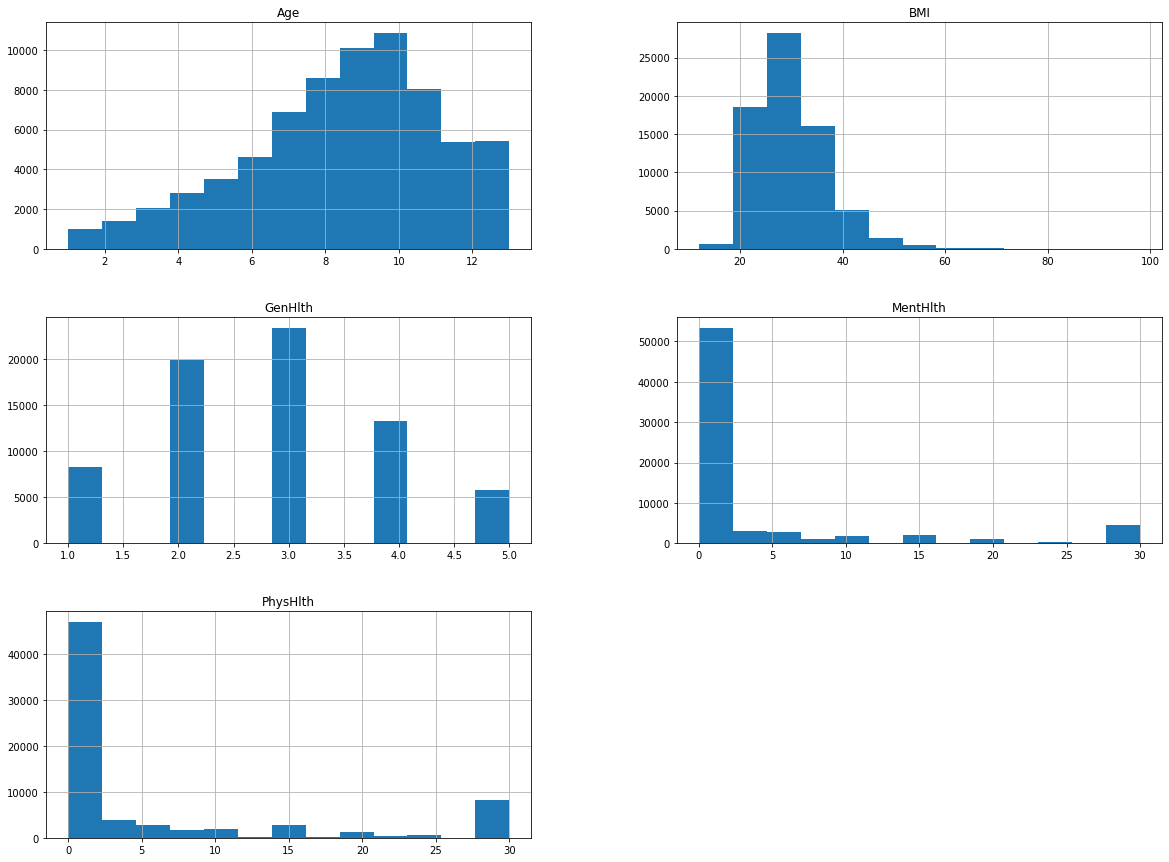

In [23]:
data.hist(bins=13, figsize=(20,15))
plt.show()

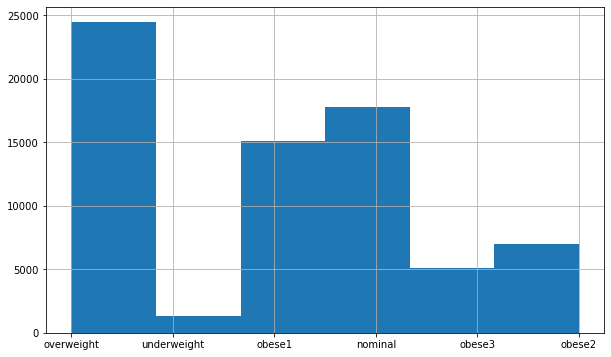

In [24]:
data.BMIGroup.hist(bins=6, figsize=(10,6))
plt.show()

# Stratified Shuffle Split

In [25]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits = 1, test_size=0.2, random_state=12)
for train_idx, test_idx in split.split(data, data['BMIGroup']):
    strat_train_set = data.loc[train_idx]
    strat_test_set = data.loc[test_idx]

In [26]:
strat_test_set['BMIGroup'].value_counts()/len(strat_test_set)

overweight     0.345852
nominal        0.251786
obese1         0.213099
obese2         0.098663
obese3         0.071575
underweight    0.019025
Name: BMIGroup, dtype: float64

In [27]:
(strat_test_set[['Hypertension', 'Stroke', 'Diabetes']].value_counts()/len(strat_test_set))

Hypertension  Stroke  Diabetes
True          False   True        0.335597
False         False   False       0.307306
True          False   False       0.178655
False         False   True        0.114506
True          True    True        0.039677
                      False       0.012448
False         True    True        0.006648
                      False       0.005163
dtype: float64

In [28]:
master = strat_train_set.copy()
master.head()

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Diabetes,Hypertension,Stroke,BMIGroup
50638,6,False,True,True,25.0,False,False,True,True,True,False,2,0,0,False,True,True,False,nominal
30404,7,True,False,True,25.0,True,False,True,False,True,False,3,5,7,False,False,True,False,nominal
25075,6,False,False,True,42.0,False,False,True,True,True,False,2,0,0,False,False,False,False,obese3
54368,12,True,True,True,26.0,True,True,False,True,False,False,3,0,0,True,True,True,False,overweight
32188,11,True,True,True,26.0,False,False,True,True,False,False,2,0,0,False,False,True,False,overweight


In [29]:
master['BMI'].value_counts()

27.0    5052
26.0    3977
28.0    3682
24.0    3507
30.0    3481
        ... 
76.0       2
80.0       1
74.0       1
86.0       1
78.0       1
Name: BMI, Length: 77, dtype: int64

In [30]:
labels = ['Hypertension', 'Stroke', 'Diabetes']
stroke_agg = master.groupby('BMIGroup')['Stroke'].value_counts()
diabetes_agg = master.groupby('BMIGroup')['Diabetes'].value_counts()
hyper_t_agg = master.groupby('BMIGroup')['Hypertension'].value_counts()
_df = pd.DataFrame([stroke_agg, diabetes_agg, hyper_t_agg]).T.reset_index()
_df

,BMIGroup,level_1,Stroke,Diabetes,Hypertension
0,underweight,False,996,820,709
1,underweight,True,79,255,366
2,nominal,False,13508,10061,8852
3,nominal,True,732,4179,5388
4,overweight,False,18350,10285,8695
5,overweight,True,1208,9273,10863
6,obese1,False,11258,4521,4015
7,obese1,True,793,7530,8036
8,obese2,False,5196,1602,1500
9,obese2,True,384,3978,4080


In [31]:
mask = _df['level_1'] == True
norm_rates = _df[mask].set_index('BMIGroup')/master.groupby('BMIGroup').count()[labels]
norm_rates.drop('level_1',axis=1, inplace=True)

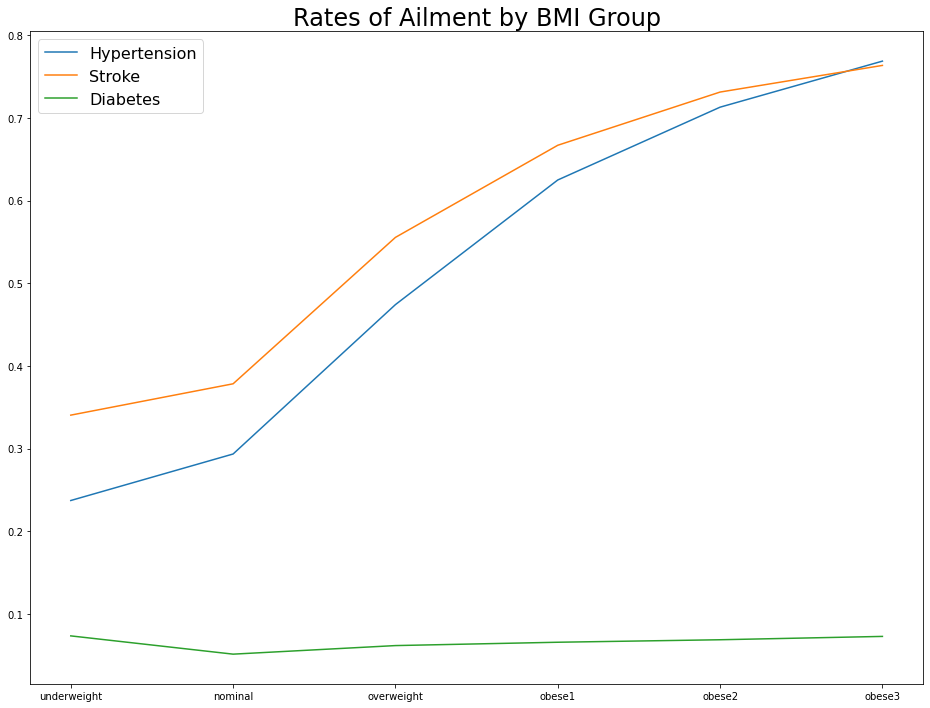

In [32]:
# All three labels appear to follow distribution of BMIGroup
plt.figure(figsize=(16,12))
plt.plot(norm_rates, label=labels)
plt.legend(loc='best', fontsize=16) 
plt.title('Rates of Ailment by BMI Group', fontsize=24)
plt.savefig('Images/NormalizedRateBMIGroup.png')
plt.show()

In [33]:
corr_matrix = master.corr()
corr_matrix[labels]

,Hypertension,Stroke,Diabetes
Age,0.340339,0.123082,0.278390
Sex,0.040486,0.001993,0.045720
HighChol,0.316871,0.097857,0.290223
CholCheck,0.101539,0.020479,0.115492
BMI,0.240026,0.022632,0.294080
Smoker,0.084997,0.065263,0.083708
HeartAttack,0.209933,0.226878,0.213452
PhysActivity,-0.134245,-0.081029,-0.159548
Fruits,-0.041289,-0.007038,-0.054066
Veggies,-0.067644,-0.048232,-0.080777


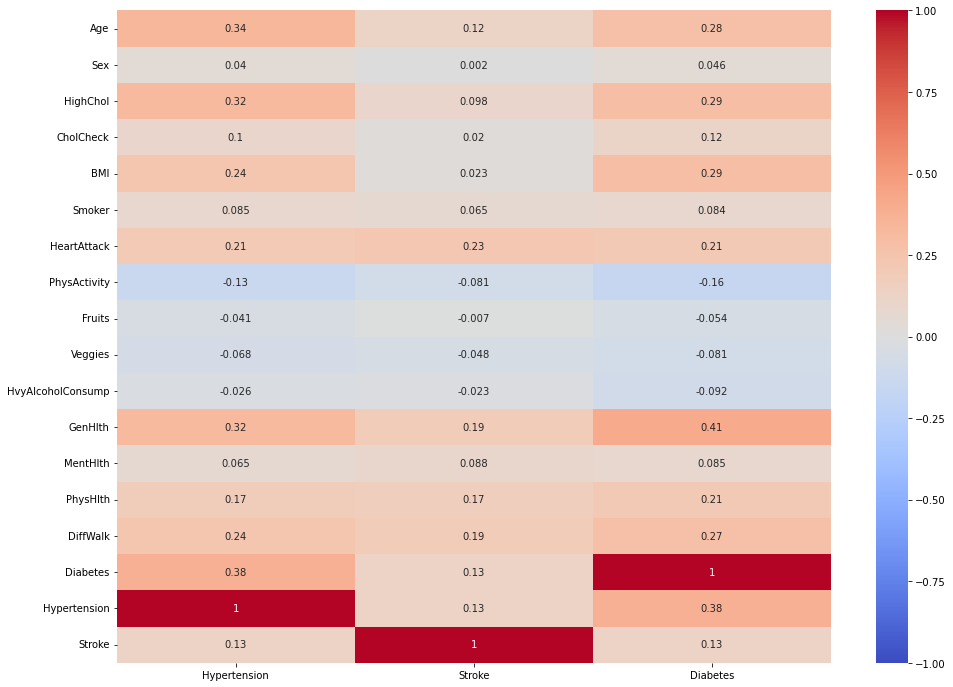

In [34]:
plt.figure(figsize=(16,12))
sns.heatmap(corr_matrix[labels], vmin=-1, vmax=1, cmap='coolwarm', annot=True)
plt.savefig('Images/HeatmapCorr.png')

In [35]:
master = strat_train_set.drop(labels, axis=1)
master_labels = strat_train_set[labels]

## Encoding
Looking at encoding we have 1 definitive ordinal
* GenHlth (.32/.19/.41)

We also have two seemingly ordinal, but they're a little more complicated, so possibly not.
* BMIGroup (?/?/?)
* Age (.34/.12/.228)

#### Numerics
* MentHlth (.065/.088/.085)
* PhysHlth (.17/.17/.21)
* BMI (.24/.023/.29)

We will also want to have the option to use either BMI or BMIGroup, or possibly both.
* Age as;
    * ordinal 
    * numeric
    * OneHot
* BMI as;
    * numeric
    * ordinal ?
* BMIGroup as;
    * ordinal
    * OneHot
* BMIGroup vs. BMI
    * xx vs yy

In [36]:
ordinal_cat = master[['GenHlth', 'BMIGroup']]
health_bools = master[['Sex','HighChol','CholCheck','Smoker','PhysActivity','Fruits','Veggies','HvyAlcoholConsump',
         'DiffWalk','HeartAttack']]
health_num = master[['PhysHlth', 'MentHlth', 'BMI', 'Age']]

In [37]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
health_cat_encoded = ordinal_encoder.fit_transform(ordinal_cat)

In [38]:
from sklearn.base import BaseEstimator, TransformerMixin, ClassifierMixin
# BMI_idx, BMIGroup_idx = 4, 15
class AttributeSelection(BaseEstimator, TransformerMixin):
    def __init__(self, add_BMIGroup = True, add_BMI = False):
        self.add_BMIGroup = add_BMI_Group,
        self.add_BMI = add_BMI
        

In [39]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('std_scaler', StandardScaler())
])
 
health_num_encoded = num_pipeline.fit_transform(health_num)


In [40]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
num_attrs = list(health_num)
ord_attrs = list(ordinal_cat)
bool_attrs = list(health_bools)

full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attrs),
    ('cat', OrdinalEncoder(), ord_attrs),
    ('bool', OneHotEncoder(), bool_attrs),
])
health_prepared = full_pipeline.fit_transform(master)

# Multilabel Classification


In [41]:
y_train_master = strat_train_set[['Hypertension', 'Stroke', 'Diabetes']]
y_train_ht, y_train_str, y_train_dbs = y_train_master['Hypertension'],  y_train_master['Stroke'], y_train_master['Diabetes']
y_train_multilabel = np.c_[y_train_ht, y_train_str, y_train_dbs]

## Multilabel Classification for Log Regression

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier

log_reg = LogisticRegression()
moc = MultiOutputClassifier(log_reg, n_jobs=5).fit(health_prepared, y_train_multilabel)

In [43]:
# Multilabel Classification for TEST set
X_test = strat_test_set.drop(labels, axis=1)
y_test_master = strat_test_set[labels]
y_test_ht, y_test_str, y_test_dbs = y_test_master['Hypertension'], y_test_master['Stroke'], y_test_master['Diabetes']
y_test_multilabel = np.c_[y_test_ht, y_test_str, y_test_dbs]

In [44]:
from sklearn.metrics import confusion_matrix, accuracy_score
X_test_prepared = full_pipeline.fit_transform(X_test)
prediction = moc.predict(X_test_prepared)
accuracy_score(y_test_multilabel, prediction)

0.5342669212815616

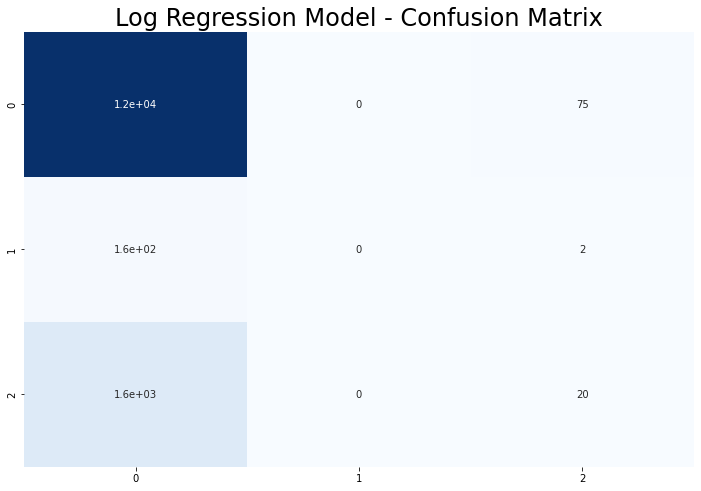

In [45]:
from sklearn.metrics import plot_confusion_matrix
cm = confusion_matrix(y_test_master.values.argmax(axis=1), prediction.argmax(axis=1))
plt.figure(figsize=(12,8))
con_matrix = sns.heatmap(cm, annot=True, cbar=False, cmap=plt.cm.Blues)
plt.title('Log Regression Model - Confusion Matrix', fontsize=24)
plt.show()

# Linear Regression
## Prediction
Prediction of Hypertension

In [46]:
from sklearn.linear_model import LogisticRegression
log_reg_ht = LogisticRegression()
log_reg_ht.fit(health_prepared, master_labels.iloc[:,0])

LogisticRegression()

In [47]:
_data = strat_test_set.drop(labels, axis=1)
_labels = strat_test_set['Hypertension']
_data_preped = full_pipeline.transform(_data)
final_predictions = log_reg_ht.predict(_data_preped)
prediction_ht = log_reg_ht.predict(_data_preped)

## Confusion Matrix

In [48]:
from sklearn.metrics import confusion_matrix, accuracy_score
accuracy_score(strat_test_set.Hypertension, prediction_ht)

0.7350590565103614

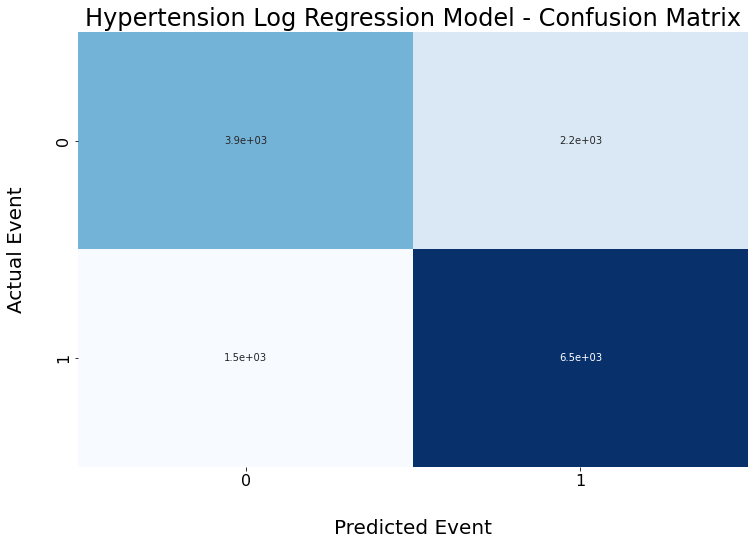

In [49]:
from sklearn.metrics import plot_confusion_matrix
cm = confusion_matrix(strat_test_set.Hypertension, prediction_ht)
plt.figure(figsize=(12,8))
con_matrix = sns.heatmap(cm, annot=True, cbar=False, cmap=plt.cm.Blues)
plt.title('Hypertension Log Regression Model - Confusion Matrix', fontsize=24)
plt.xticks([.5,1.5], fontsize=16)
plt.yticks([.5,1.5], fontsize=16)
plt.ylabel('Actual Event', labelpad=30, size=20)
plt.xlabel('Predicted Event', labelpad=30, size=20)
plt.show()
con_matrix.get_figure().savefig('images/Log_Reg_Confusion_matrix_prelim.png')

In [59]:
strat_test_set

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Diabetes,Hypertension,Stroke,BMIGroup
51682,10,False,False,True,28.0,False,False,True,True,True,False,1,0,0,False,True,True,False,overweight
32180,13,True,True,True,27.0,False,False,True,True,True,False,2,2,0,False,False,False,False,overweight
27331,10,False,False,True,21.0,False,False,True,True,True,False,1,0,0,False,False,False,False,nominal
39596,8,False,False,True,33.0,False,False,True,False,False,False,4,0,0,False,True,True,False,obese1
64059,9,True,True,True,43.0,True,False,False,False,True,False,2,0,0,False,True,True,False,obese3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16999,10,False,False,True,30.0,False,False,True,True,True,False,1,0,0,False,False,False,False,overweight
70671,4,True,False,True,31.0,True,False,True,True,True,False,3,0,5,False,True,True,False,obese1
69456,11,False,True,True,22.0,False,True,False,False,True,False,5,0,28,False,True,True,True,nominal
45038,11,True,True,True,28.0,False,False,False,False,False,False,1,2,0,False,True,True,False,overweight


# Log Reg Stroke

In [50]:
log_reg_st = LogisticRegression()
log_reg_st.fit(health_prepared, master_labels.iloc[:,1])

LogisticRegression()

In [51]:
_data = strat_test_set.drop(labels, axis=1)
_labels = strat_test_set['Stroke']
# _data_preped was already called in log_reg_st pipeline
# _data_preped = full_pipeline.transform(_data)
final_predictions_st = log_reg_st.predict(_data_preped)
prediction_st = log_reg_st.predict(_data_preped)

In [52]:
from sklearn.metrics import confusion_matrix, accuracy_score
accuracy_score(strat_test_set.Stroke, prediction_st)

0.9356390126600184

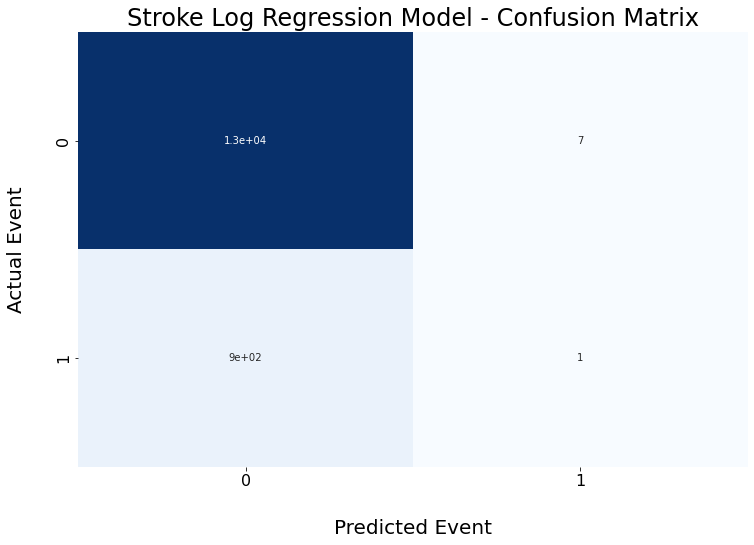

In [53]:
from sklearn.metrics import plot_confusion_matrix
cm = confusion_matrix(strat_test_set.Stroke, prediction_st)
plt.figure(figsize=(12,8))
con_matrix = sns.heatmap(cm, annot=True, cbar=False, cmap=plt.cm.Blues)
plt.title('Stroke Log Regression Model - Confusion Matrix', fontsize=24)
plt.xticks([.5, 1.5], fontsize=16)
plt.yticks([.5, 1.5], fontsize=16)
plt.ylabel('Actual Event', labelpad=30, size=20)
plt.xlabel('Predicted Event', labelpad=30, size=20)
plt.show()
# con_matrix.get_figure().savefig('images/Log_Reg_Confusion_matrix_prelim.png')

# Log Reg Diabetes

In [54]:
log_reg_dbs = LogisticRegression()
log_reg_dbs.fit(health_prepared, master_labels.iloc[:,2])

LogisticRegression()

In [55]:
# _data was already created 
# _data = strat_test_set.drop(labels, axis=1)
_labels = strat_test_set['Diabetes']
# _data_preped was already created
# _data_preped = full_pipeline.transform(_data)
final_prediction_dbs = log_reg_dbs.predict(_data_preped)

In [56]:
# from sklearn.metrics import confusion_matrix, accuracy_score
accuracy_score(strat_test_set.Diabetes, final_prediction_dbs)

0.7396562698917887

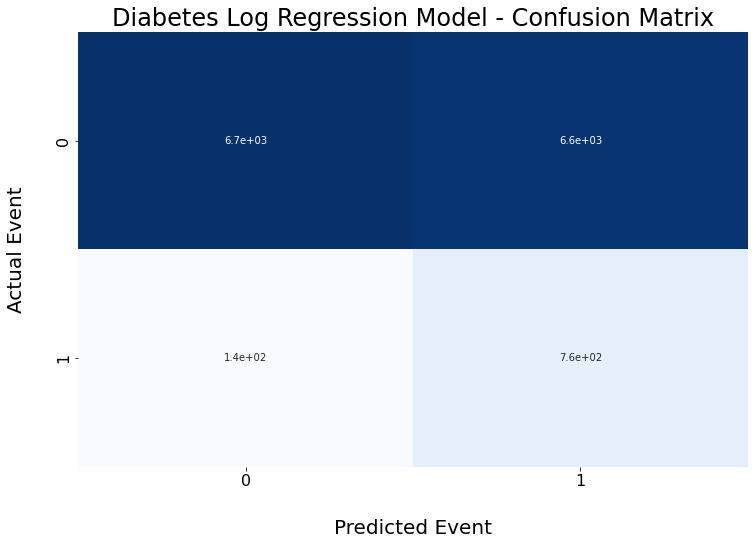

In [57]:
from sklearn.metrics import plot_confusion_matrix
cm = confusion_matrix(strat_test_set.Stroke, final_prediction_dbs)
plt.figure(figsize=(12,8))
con_matrix = sns.heatmap(cm, annot=True, cbar=False, cmap=plt.cm.Blues)
plt.title('Diabetes Log Regression Model - Confusion Matrix', fontsize=24)
plt.xticks([.5, 1.5], fontsize=16)
plt.yticks([.5, 1.5], fontsize=16)
plt.ylabel('Actual Event', labelpad=30, size=20)
plt.xlabel('Predicted Event', labelpad=30, size=20)
plt.show()
# con_matrix.get_figure().savefig('images/Log_Reg_Confusion_matrix_prelim.png')

In [58]:
strat_test_set.query('Stroke == True')

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Diabetes,Hypertension,Stroke,BMIGroup
60190,13,False,False,True,24.0,True,False,True,True,True,False,2,0,0,False,True,False,True,nominal
30116,9,True,True,True,25.0,True,False,False,False,True,False,5,25,7,True,False,True,True,nominal
68126,9,True,True,True,26.0,False,False,True,False,True,True,5,14,5,True,True,True,True,overweight
58010,12,True,True,True,26.0,True,True,True,True,True,False,3,0,0,True,True,True,True,overweight
62784,8,True,True,True,24.0,False,False,False,True,True,False,4,5,30,False,True,True,True,nominal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36095,6,False,True,True,36.0,False,False,True,True,True,False,3,10,3,True,True,True,True,obese2
23152,9,True,True,True,18.0,True,True,True,True,True,False,5,0,30,True,False,False,True,underweight
44402,8,False,True,True,27.0,True,True,True,False,True,False,3,30,30,True,True,True,True,overweight
52253,12,False,True,True,33.0,False,False,False,False,False,False,5,30,30,True,True,True,True,obese1
